In [1]:
import os
import torch
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datasets import Dataset
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

In [2]:
# Path to the clients_dataset folder
client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_dataset"
# No. of Clients
num_clients = len([f for f in os.listdir(client_dataset_path) if os.path.isdir(os.path.join(client_dataset_path, f))])
num_clients

10

In [3]:
# List to store the client datasets
client_train_datasets = {}
client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for client_id in range(num_clients):
    client_folder = f"client_{client_id}"
    
    train_file = os.path.join(client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

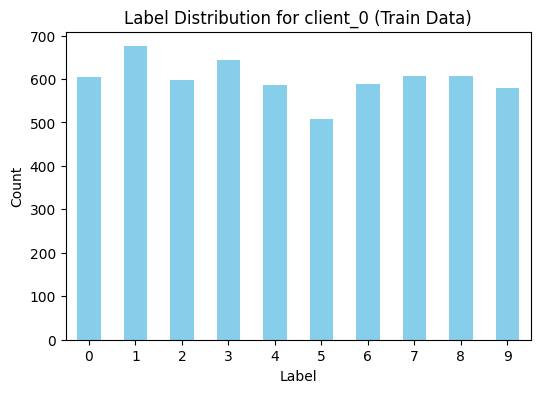

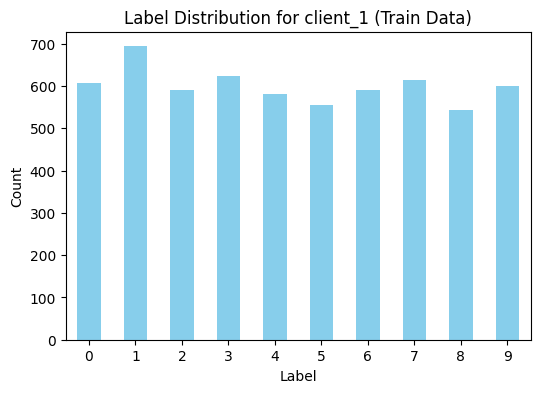

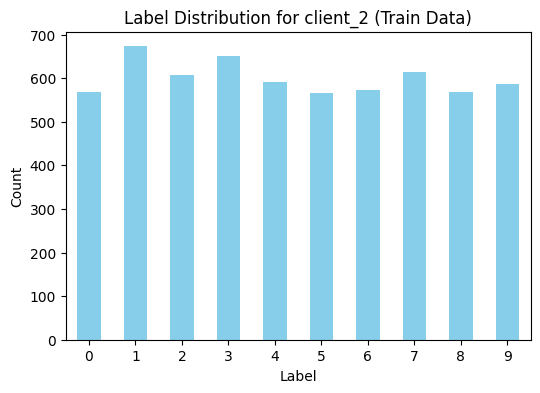

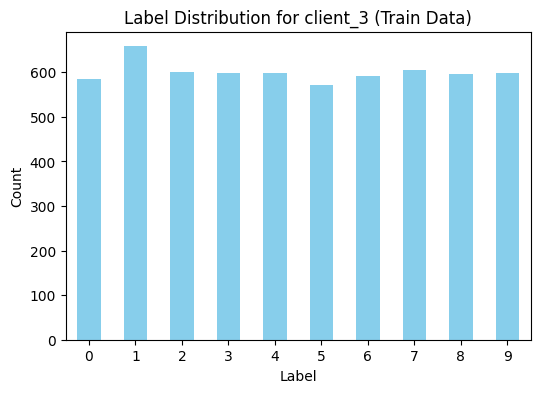

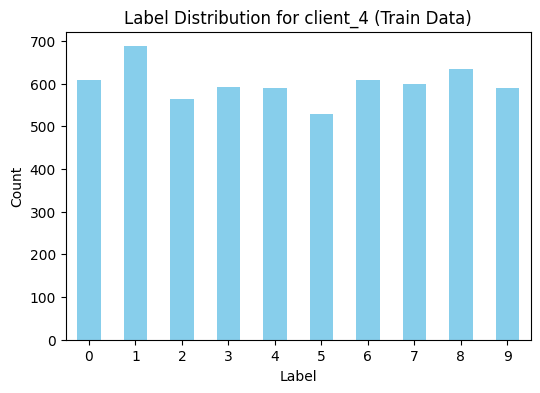

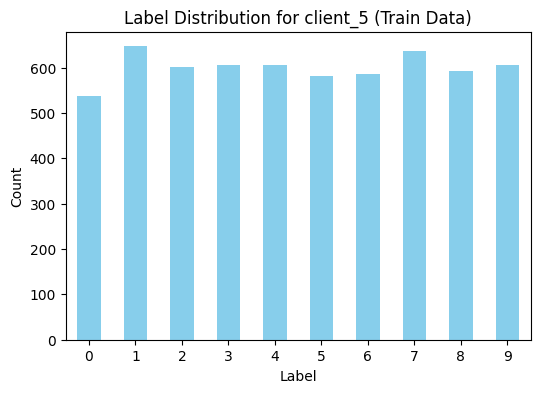

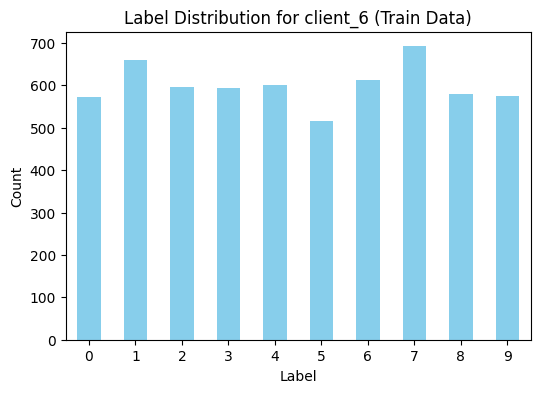

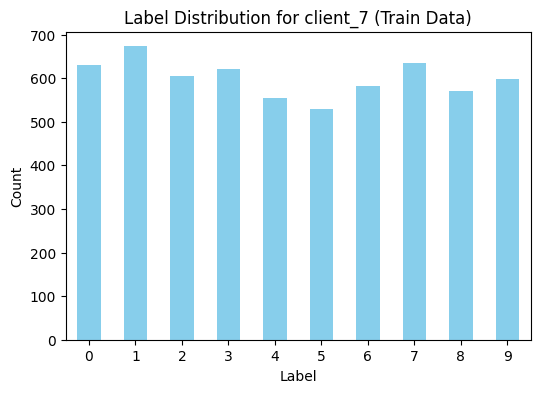

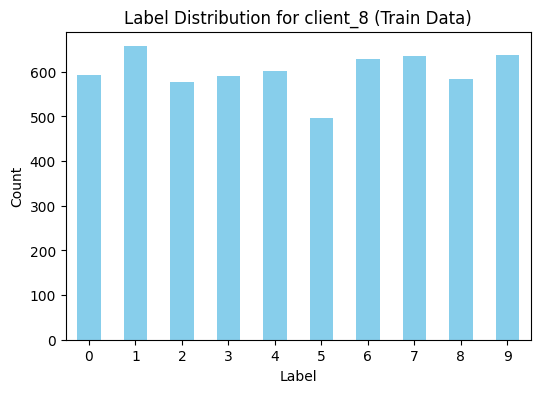

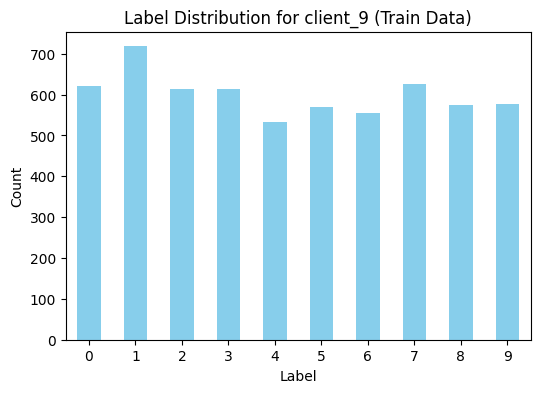

In [4]:
# Now plot the label distribution for each client
for client_folder, train_df in client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [5]:
# to_pil = transforms.ToPILImage()
# pil_image = to_pil(df_train.image[0])

# # Show the image
# pil_image.show()

In [6]:
client_train_datasets['client_1'].label.value_counts()

1    694
3    623
7    614
0    607
9    600
2    592
6    590
4    581
5    555
8    544
Name: label, dtype: int64

# Index Validation

In [7]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drift_dataset_indexes"
json_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients_json = len(json_folder)
num_drifted_clients_json

3

In [8]:
drift_client_train_json = {}
drift_client_val_json = {}

for folder in json_folder:
    client_folder = folder
    
    train_json_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.json")
    val_json_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.json")
    
    with open(train_json_file, 'r') as file:
        train_indices_list = json.load(file)
    drift_client_train_json[client_folder] = train_indices_list
    with open(val_json_file, 'r') as file:
        val_indices_list = json.load(file)
    drift_client_val_json[client_folder] = val_indices_list

In [9]:
len(drift_client_train_json['client_1'])

1323

In [10]:
len(set(drift_client_train_json['client_1']))

1062

In [11]:
len(drift_client_val_json['client_1'])

1349

In [12]:
len(set(drift_client_val_json['client_1']))

422

# Case 1: Client Drifted DataSet

In [13]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drifted_dataset"
drift_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients = len(drift_folder)
num_drifted_clients

3

In [14]:
# List to store the client datasets
drift_client_train_datasets = {}
drift_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

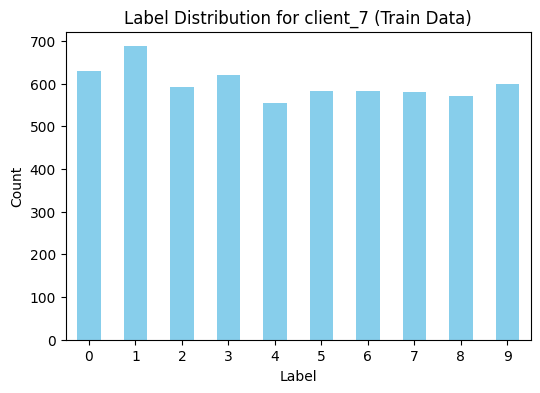

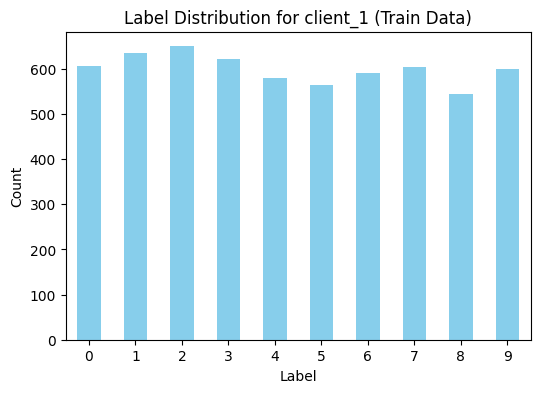

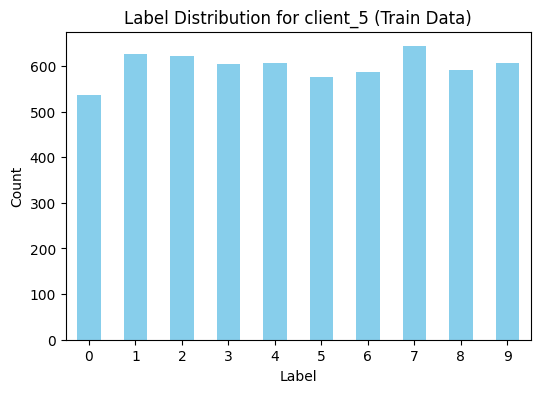

In [15]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [16]:
drift_client_train_datasets['client_1'].label.value_counts()

2    650
1    636
3    623
0    607
7    604
9    600
6    590
4    581
5    565
8    544
Name: label, dtype: int64

### Index data and dift data intersection

In [17]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))]

,image,label
4280,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
4006,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
1613,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
700,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
5109,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
...,...,...
1896,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
283,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
5905,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
3052,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2


In [18]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))].label.value_counts()

2    292
5    273
7    263
1    234
Name: label, dtype: int64

In [19]:
drift_client_train_datasets['client_1']['label'][1910]

5

In [20]:
to_pil = transforms.ToPILImage()
pil_image = to_pil(drift_client_train_datasets['client_1']['image'][1910])

# Show the image
pil_image.show()

# Case 2: Client Remaining Dataset

In [64]:
drift_rem_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_remaining_dataset"
drift_rem_folder = [f for f in os.listdir(drift_rem_client_dataset_path) if os.path.isdir(os.path.join(drift_rem_client_dataset_path, f))]
num_rem_drifted_clients = len(drift_rem_folder)
num_rem_drifted_clients

3

In [65]:
# List to store the client datasets
drift_rem_client_train_datasets = {}
drift_rem_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_rem_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_rem_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_rem_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_rem_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_rem_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

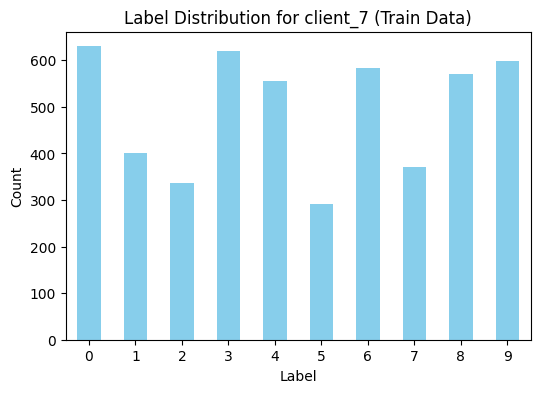

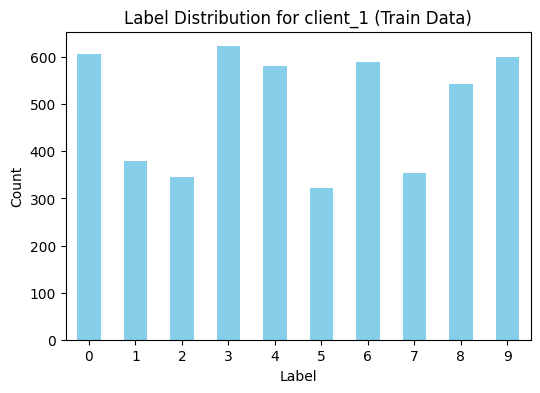

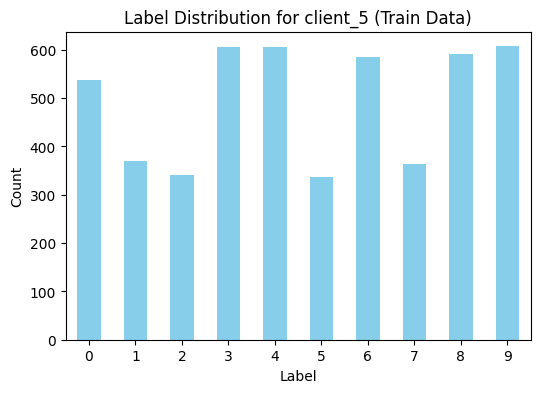

In [66]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_rem_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [67]:
drift_rem_client_train_datasets['client_1'].label.value_counts()

3    623
0    607
9    600
6    590
4    581
8    544
1    380
7    354
2    345
5    323
Name: label, dtype: int64

In [68]:
drift_rem_client_train_datasets['client_1'].shape

(4947, 2)

### Index data and remaning data intersection

In [69]:
drift_rem_set = list(dict.fromkeys(drift_client_val_json['client_1']))
drift_rem_client_val_dataset['client_1'].iloc[drift_rem_set].label.value_counts()

1    133
2    105
7     94
5     89
Name: label, dtype: int64

# Plots

### Client distribution

In [91]:
def plot_client_label_distribution(client_train_datasets, drift_client_train_datasets, drift_rem_client_train_datasets, client_id='client_1'):
    if client_id not in client_train_datasets or \
       client_id not in drift_client_train_datasets or \
       client_id not in drift_rem_client_train_datasets:
        print(f"Client ID '{client_id}' not found in one or more datasets.")
        return

    before_swap = client_train_datasets[client_id]['label'].value_counts().sort_index()
    after_swap = drift_client_train_datasets[client_id]['label'].value_counts().sort_index()
    after_removal = drift_rem_client_train_datasets[client_id]['label'].value_counts().sort_index()

    all_labels = sorted(set(before_swap.index) | set(after_swap.index) | set(after_removal.index))
    before_swap = before_swap.reindex(all_labels, fill_value=0)
    after_swap = after_swap.reindex(all_labels, fill_value=0)
    after_removal = after_removal.reindex(all_labels, fill_value=0)

    sns.set_theme(style="whitegrid")
    colors = sns.color_palette("muted")

    x = np.arange(len(all_labels))
    width = 0.25

    plt.figure(figsize=(8, 4))

    plt.bar(x - width, before_swap, width, label='Before label swap', color=colors[0], edgecolor='black', linewidth=0.7)
    plt.bar(x, after_swap, width, label='After abrupt drift (1<->2, 5<->7)', color=colors[1], edgecolor='black', linewidth=0.7)
    plt.bar(x + width, after_removal, width, label='After swapped labels removal', color=colors[2], edgecolor='black', linewidth=0.7)

    plt.xlabel('Label', fontsize=12, fontweight='bold')
    plt.ylabel('Samples', fontsize=12, fontweight='bold')
    plt.xticks(x, all_labels, fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')

    plt.legend(title="Distributions", loc="center", bbox_to_anchor=(1, 1), fontsize=10)
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

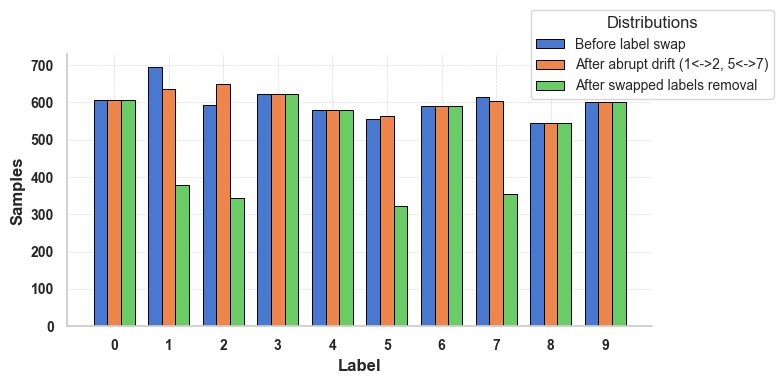

In [92]:
plot_client_label_distribution(client_train_datasets, drift_client_train_datasets, drift_rem_client_train_datasets)

### Local Models 

In [4]:
# Define the path to the log directory
plot_dir = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots"

In [5]:
client_colors = sns.color_palette("tab10", 10)

def plot_clients(mode):
    file_path = os.path.join(plot_dir, f"results_{mode}.json")
    with open(file_path, 'r') as file:
        data = json.load(file)

    sns.set_theme(style="whitegrid")

    client_ids = sorted(map(int, data.keys()))
    color_map = {str(client_id): client_colors[i % len(client_colors)] for i, client_id in enumerate(client_ids)}

    # Accuracy plot
    plt.figure(figsize=(10, 5))
    for client_id in map(str, client_ids):
        rounds = range(1, len(data[client_id]["accuracy"]) + 1)
        accuracies = [acc * 100 for acc in data[client_id]["accuracy"]]
        plt.plot(rounds, accuracies, marker='o', markersize=4, linestyle='-', linewidth=0.8, 
                 color=color_map[client_id], label=f"Client {client_id}")

    plt.xlabel("Rounds", fontsize=12, fontweight='bold')
    plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
    plt.title("Client-wise Accuracy over Rounds", fontsize=14, fontweight='bold')
    
    plt.xticks(range(1, len(next(iter(data.values()))["accuracy"]) + 1), fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')
    
    plt.legend(title="Clients", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

#     # Loss plot
#     plt.figure(figsize=(10, 5))
#     for client_id in map(str, client_ids):
#         plt.plot(range(len(data[client_id]["loss"])), data[client_id]["loss"], 
#                  marker='o', markersize=5, linestyle='-', linewidth=1.5, 
#                  color=color_map[client_id], label=f"Client {client_id}")

#     plt.xlabel("Rounds", fontsize=12)
#     plt.ylabel("Loss", fontsize=12)
#     plt.title("Client-wise Loss over Rounds", fontsize=14, fontweight='bold')
#     plt.xticks(range(1, len(next(iter(data.values()))["loss"]) + 1), fontsize=10)
#     plt.yticks(fontsize=10)
#     plt.legend(title="Clients", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
#     plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
#     plt.tight_layout()
#     plt.show()

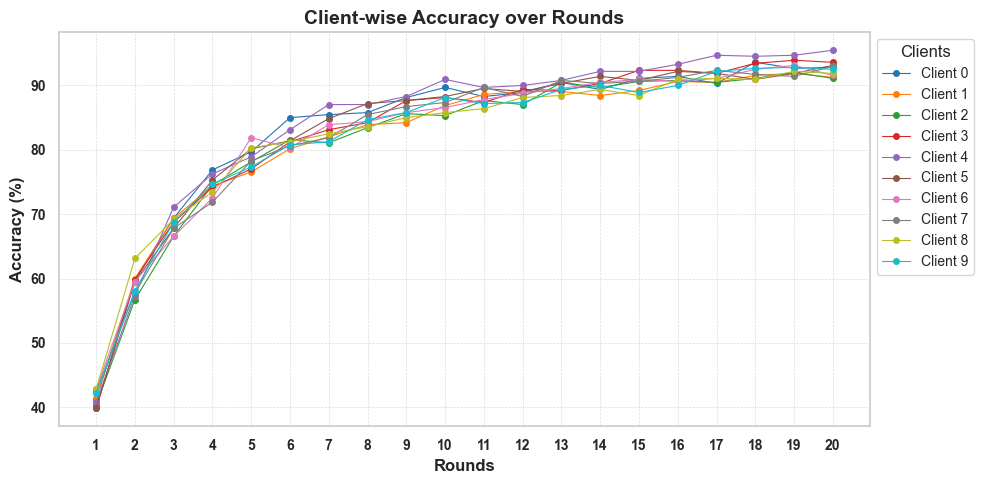

In [6]:
plot_clients("fl-case")

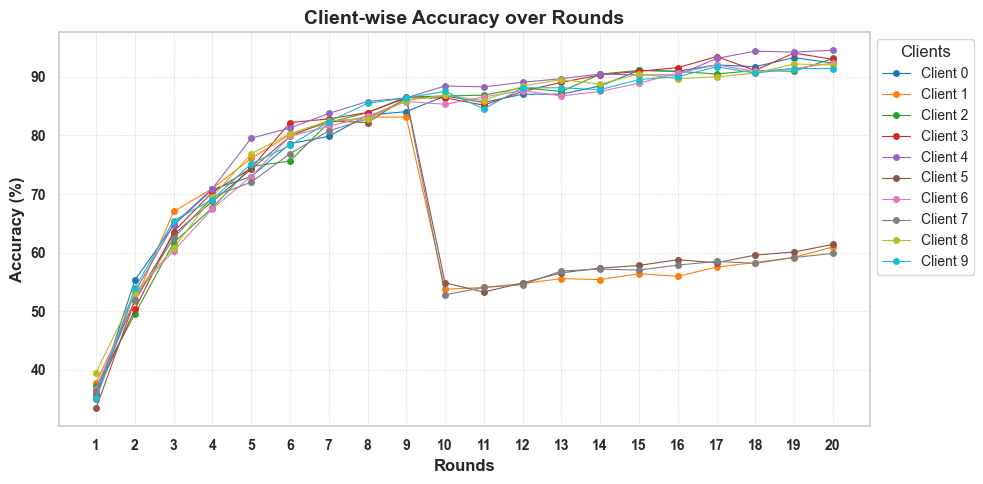

In [7]:
plot_clients("drift-case")

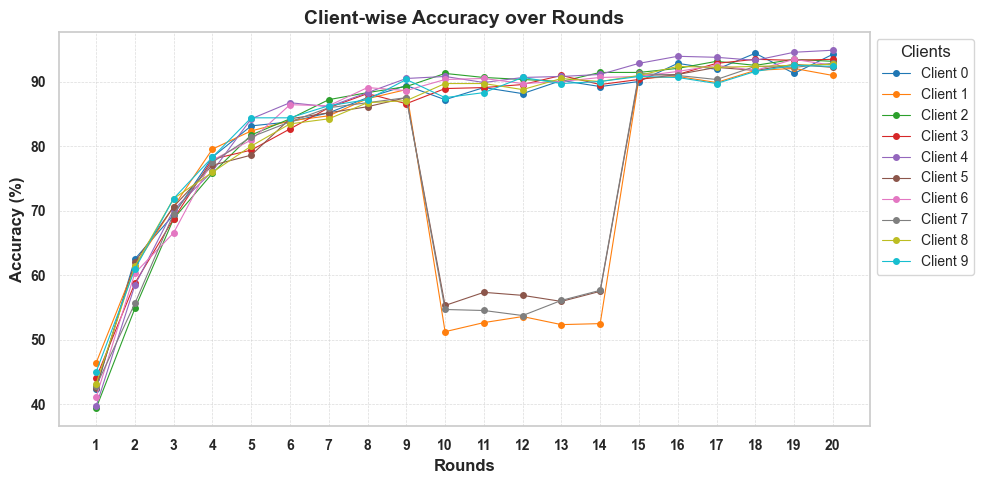

In [8]:
plot_clients("retraining-case")

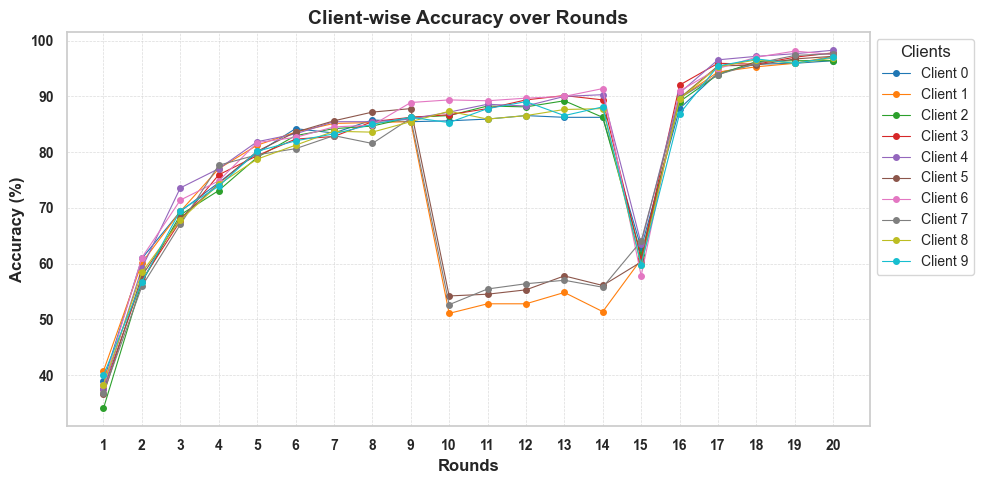

In [9]:
plot_clients("rapid-retraining-case")

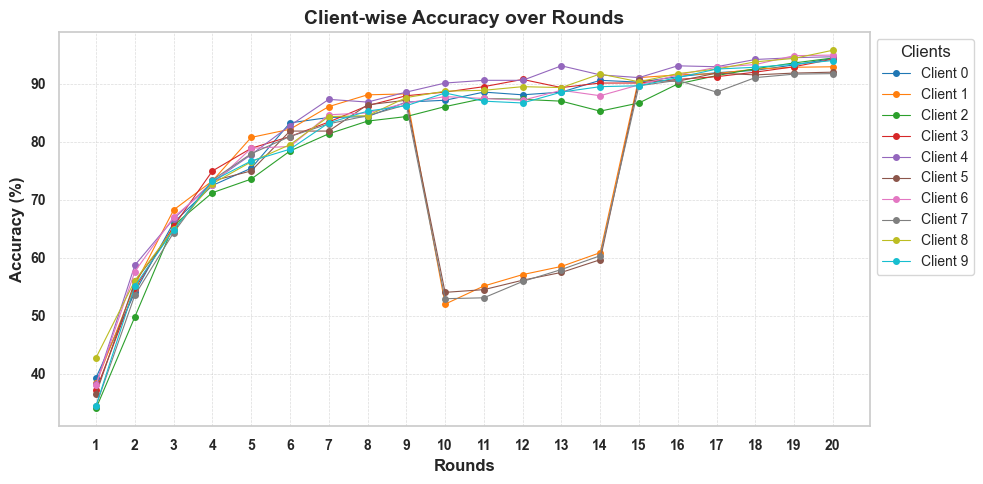

In [10]:
plot_clients("fedau-case")

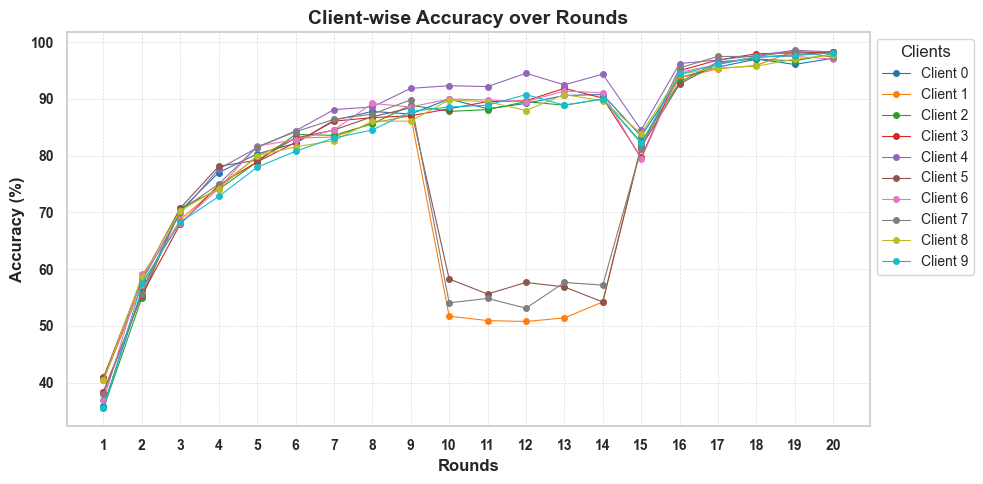

In [11]:
plot_clients("fluid-case")

### Global Model

In [16]:
# Get list of all JSON files
json_files = [f for f in os.listdir(plot_dir) if f.endswith(".json")]

# Store global accuracy and loss per file
global_accuracies = []
global_losses = []
labels = []

# Process each JSON file
for file in json_files:
    file_path = os.path.join(plot_dir, file)
    
    # Extract meaningful label from filename
    label = file.replace("results_", "").replace(".json", "")
    label = '-'.join([word.capitalize() for word in label.split('-')]) 
    labels.append(label)
    
    # Load JSON data
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Find the number of rounds from any client entry
    num_rounds = len(next(iter(data.values()))["accuracy"])
    
    # Initialize lists to store round-wise accuracy and loss
    round_accuracies = [[] for _ in range(num_rounds)]
    round_losses = [[] for _ in range(num_rounds)]
    
    # Collect accuracy and loss for each round across all clients
    for client_values in data.values():
        for i in range(num_rounds):
            round_accuracies[i].append(client_values["accuracy"][i])
            round_losses[i].append(client_values["loss"][i])
    
    # Compute average accuracy and loss for each round (global model)
    avg_accuracies = [np.mean(round_acc) for round_acc in round_accuracies]
    avg_losses = [np.mean(round_loss) for round_loss in round_losses]
    
    # Store results
    global_accuracies.append(avg_accuracies)
    global_losses.append(avg_losses)

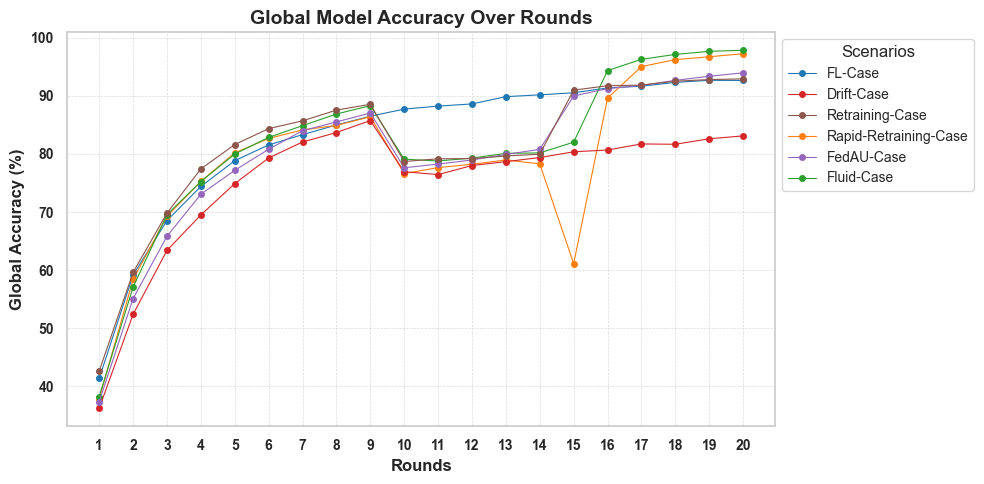

In [22]:
# Plot global accuracy
plt.figure(figsize=(10, 5))
for i, acc in enumerate(global_accuracies):
    rounds = range(1, len(acc) + 1)
    accuracies = [a * 100 for a in acc]
    plt.plot(rounds, accuracies, marker='o', markersize=4, linestyle='-', linewidth=0.8,
             color=client_colors[i], label=labels[i])

plt.xlabel("Rounds", fontsize=12, fontweight='bold')
plt.ylabel("Global Accuracy (%)", fontsize=12, fontweight='bold')
plt.title("Global Model Accuracy Over Rounds", fontsize=14, fontweight='bold')

plt.xticks(range(1, len(global_accuracies[0]) + 1), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

desired_order = ["Fl-Case", "Drift-Case", "Retraining-Case", "Rapid-Retraining-Case", "Fedau-Case", "Fluid-Case"]
handles, labels = plt.gca().get_legend_handles_labels()
label_handle_map = dict(zip(labels, handles))
ordered_handles = [label_handle_map[label] for label in desired_order if label in label_handle_map]
ordered_labels = [
    "FL-Case" if label == "Fl-Case" else
    "FedAU-Case" if label == "Fedau-Case" else
    label
    for label in desired_order if label in label_handle_map
]
plt.legend(ordered_handles, ordered_labels, title="Scenarios", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# # Plot global loss
# plt.figure(figsize=(10, 5))
# for i, loss in enumerate(global_losses):
#     rounds = range(1, len(loss) + 1)  # Shift x-axis to start from 1
#     plt.plot(rounds, loss, marker='o', markersize=4, linestyle='-', linewidth=1,
#              color=client_colors[i], label=labels[i])

# plt.xlabel("Rounds", fontsize=12, fontweight='bold')
# plt.ylabel("Global Loss", fontsize=12, fontweight='bold')
# plt.title("Global Model Loss Over Rounds", fontsize=14, fontweight='bold')

# plt.xticks(range(1, len(global_losses[0]) + 1), fontsize=10, fontweight='bold')
# plt.yticks(fontsize=10, fontweight='bold')

# plt.legend(title="Models", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
# plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
# plt.tight_layout()
# plt.show()

In [18]:
global_accuracies

[[0.41375,
  0.5917187499999998,
  0.6853125,
  0.7440625000000001,
  0.78828125,
  0.8154687500000002,
  0.8331249999999999,
  0.8496874999999999,
  0.86484375,
  0.8770312500000002,
  0.8821875,
  0.8859375,
  0.8984375,
  0.9015625000000002,
  0.9051562500000001,
  0.9134375,
  0.91640625,
  0.9229687500000001,
  0.9265625,
  0.9262499999999999],
 [0.37875000000000003,
  0.5840624999999999,
  0.69265625,
  0.75265625,
  0.80171875,
  0.8265625,
  0.8412499999999999,
  0.84890625,
  0.86390625,
  0.76609375,
  0.77640625,
  0.7821874999999999,
  0.78953125,
  0.7828125,
  0.61125,
  0.8959374999999999,
  0.95015625,
  0.9621875,
  0.96703125,
  0.9723437500000001],
 [0.38265625,
  0.5709375,
  0.6954687500000001,
  0.7525,
  0.7998437500000001,
  0.8282812500000001,
  0.84859375,
  0.8685937499999999,
  0.8829687500000001,
  0.7909375000000001,
  0.7878125,
  0.7928124999999999,
  0.8009375000000001,
  0.80171875,
  0.8201562499999999,
  0.9432812499999998,
  0.9626562499999999,
  0.

### Drifted clients plots

In [23]:
client_colors = sns.color_palette("tab10", 10)

def plot_avg_drifted_clients():
    sns.set_theme(style="whitegrid")
    selected_clients = {"1", "5", "7"}

    # Get all result files in plot_dir
    result_files = [f for f in os.listdir(plot_dir) if f.startswith("results_") and f.endswith(".json")]

    # Define the desired legend order with renamed cases
    desired_order = ["Retraining-Case", "Rapid-Retraining-Case", "FedAU-Case", "Fluid-Case"]
    
    # Prepare a list to store the labels and plot data for the correct order
    plot_data = []

    plt.figure(figsize=(10, 5))

    for i, file_name in enumerate(result_files):
        file_path = os.path.join(plot_dir, file_name)
        with open(file_path, 'r') as file:
            data = json.load(file)

        # Collect accuracies for selected clients
        accuracies = [data[client_id]["accuracy"] for client_id in selected_clients if client_id in data]

        # Calculate average accuracy per round
        avg_accuracies = [sum(acc[i] for acc in accuracies) / len(accuracies) for i in range(len(accuracies[0]))]
        avg_accuracies = [acc * 100 for acc in avg_accuracies]  # Convert to percentage

        # Prepare the label based on the desired order
        label = file_name.replace("results_", "").replace(".json", "").title()  # Capitalize first letters
        if label == "Fedau-Case":
            label = "FedAU-Case"  # Rename "Fedau-Case" to "FedAU-Case"

        if label in desired_order:
            plot_data.append((label, avg_accuracies, client_colors[i % len(client_colors)]))

    # Sort the plot data based on the desired order
    plot_data.sort(key=lambda x: desired_order.index(x[0]))

    # Plot the data for each file in the desired order
    for label, avg_accuracies, color in plot_data:
        rounds = range(1, len(avg_accuracies) + 1)
        plt.plot(rounds, avg_accuracies, marker='o', markersize=4, linestyle='-', linewidth=1.2, 
                 color=color, label=label)

    # Set x-axis limits from 1 to 20
    plt.xticks(range(0, 21), fontsize=10, fontweight='bold')
    plt.xlim(0, 21)
    plt.yticks(fontweight='bold')

    # Labels and title
    plt.xlabel("Rounds", fontsize=12, fontweight='bold')
    plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
    plt.title("Average Accuracy of Drifted Clients 1, 5, and 7 for Recovery", fontsize=14, fontweight='bold')

    # Legend with the specified order
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

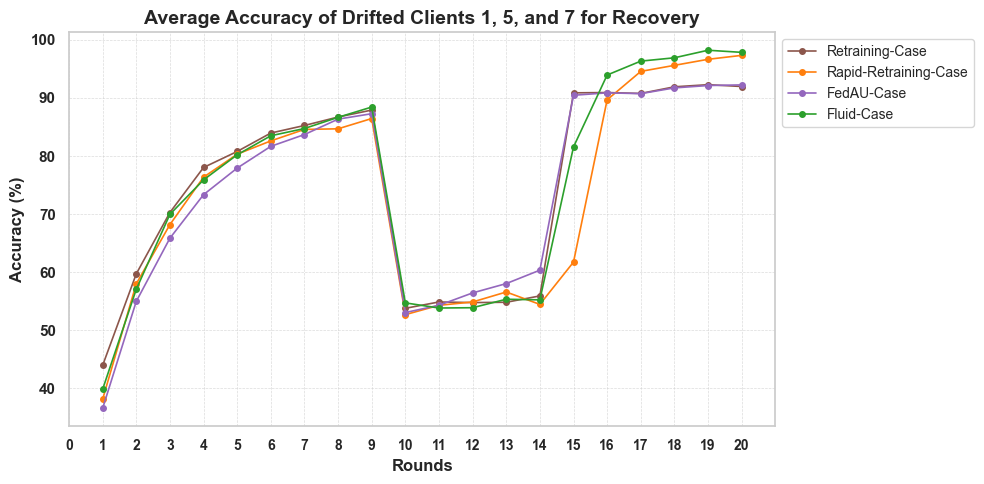

In [24]:
plot_avg_drifted_clients()

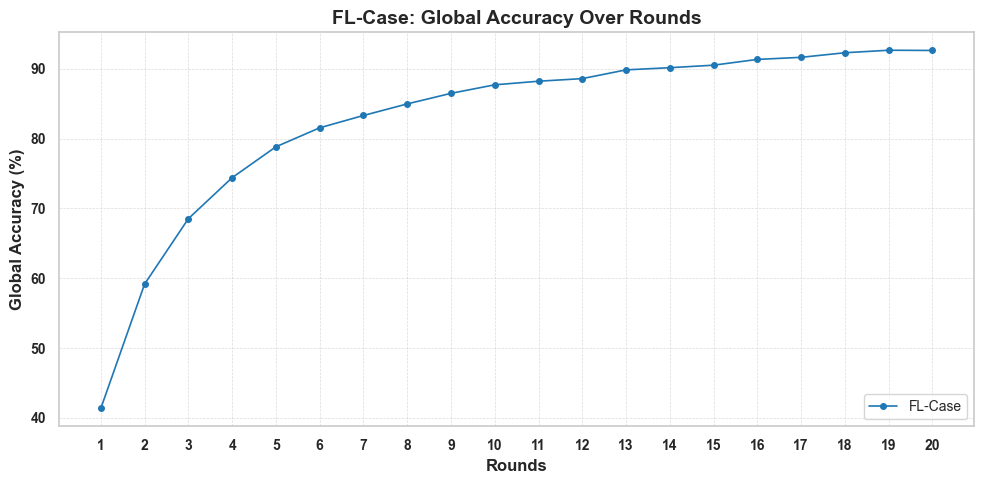

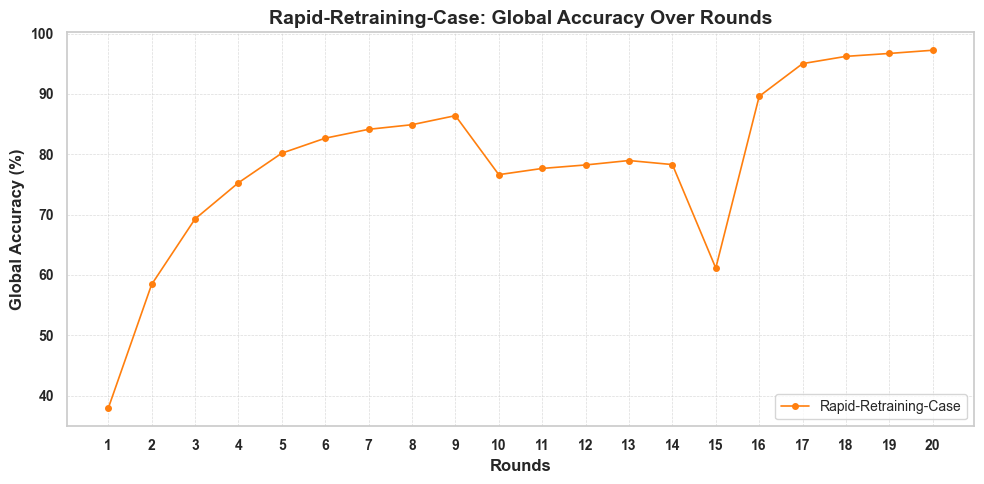

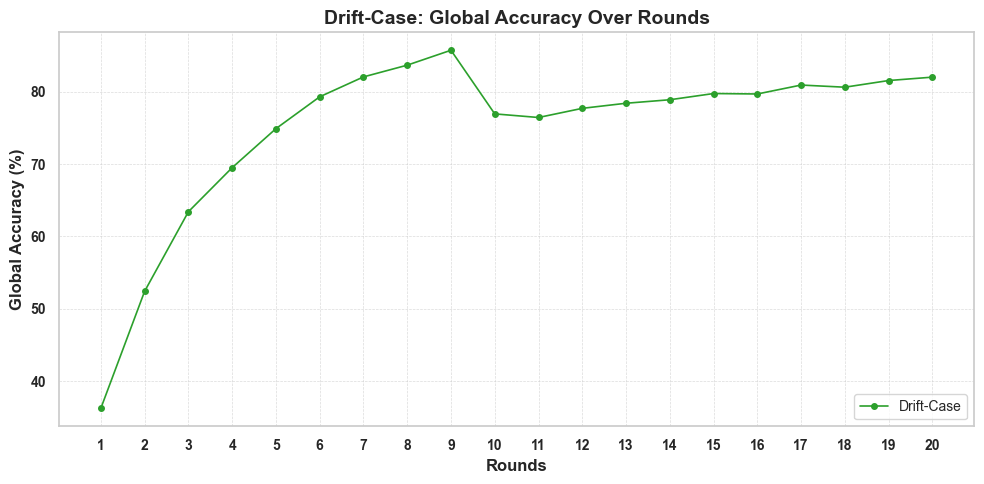

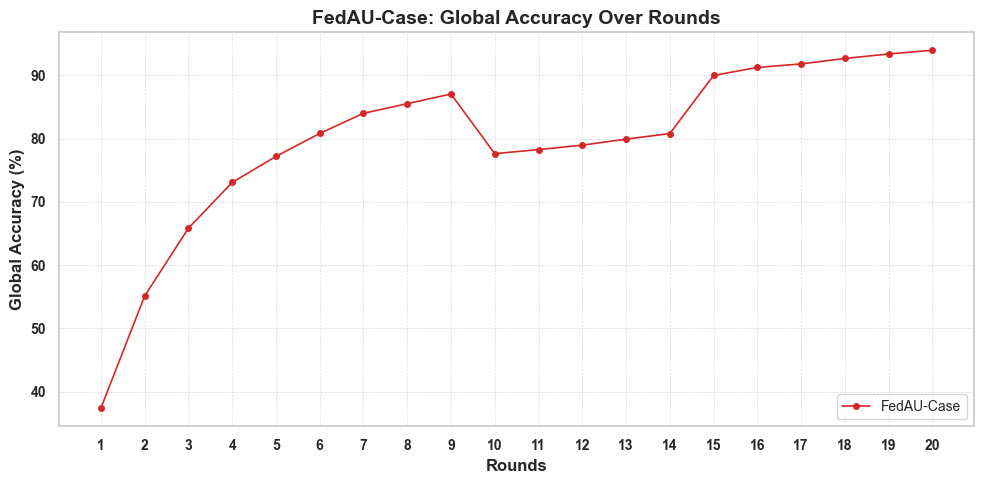

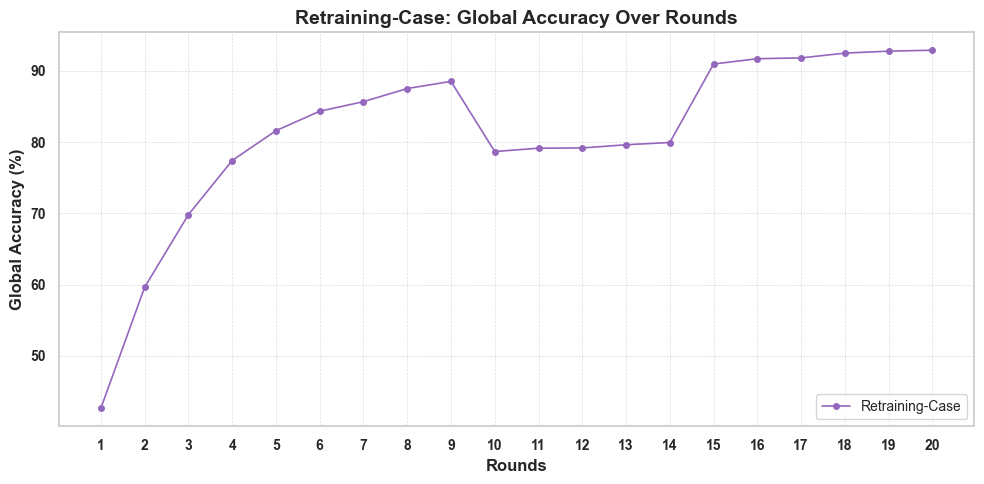

In [26]:
import matplotlib.pyplot as plt

# Define the colors as seen in the legend
scenario_colors = {
    "Fl-Case": "#1f77b4",  # Blue
    "Drift-Case": "#2ca02c",  # Green
    "Retraining-Case": "#9467bd",  # Purple
    "Rapid-Retraining-Case": "#ff7f0e",  # Orange
    "Fedau-Case": "#d62728"  # Red
}

# Define labels mapping
scenario_labels = {
    "Fl-Case": "FL-Case",
    "Drift-Case": "Drift-Case",
    "Retraining-Case": "Retraining-Case",
    "Rapid-Retraining-Case": "Rapid-Retraining-Case",
    "Fedau-Case": "FedAU-Case"
}

# Plot each case separately with the correct colors
for i, label in enumerate(["Fl-Case", "Rapid-Retraining-Case", "Drift-Case",  "Fedau-Case", "Retraining-Case"]):
    if label in scenario_labels:
        plt.figure(figsize=(10, 5))
        
        rounds = range(1, len(global_accuracies[i]) + 1)
        accuracies = [a * 100 for a in global_accuracies[i]]
        
        plt.plot(rounds, accuracies, marker='o', markersize=4, linestyle='-', linewidth=1.2,
                 color=scenario_colors[label], label=scenario_labels[label])

        plt.xlabel("Rounds", fontsize=12, fontweight='bold')
        plt.ylabel("Global Accuracy (%)", fontsize=12, fontweight='bold')
        plt.title(f"{scenario_labels[label]}: Global Accuracy Over Rounds", fontsize=14, fontweight='bold')

        plt.xticks(range(1, len(global_accuracies[i]) + 1), fontsize=10, fontweight='bold')
        plt.yticks(fontsize=10, fontweight='bold')

        plt.legend(loc="lower right", fontsize=10)
        plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
        plt.tight_layout()

        # Show each plot individually
        plt.show()
